In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='NanumGothic')
matplotlib.rc('axes', unicode_minus=False)
%matplotlib inline

In [187]:
df_m = pd.read_csv('./member_RFM.csv')

In [188]:
customer = df_m['고객번호']
recendancy = df_m['날짜']
frequency = df_m['구매횟수']
monetary = df_m['총결제금액']

In [189]:
df = pd.concat([customer,recendancy,frequency,monetary],axis =1).reset_index(drop=True)
df.columns = ['customer','recendancy','frequency','monetary']
df

,customer,recendancy,frequency,monetary
0,201901010750089,585,1,43825
1,201901010750143,585,1,43825
2,201812310749820,353,5,219351
3,201812310750007,535,2,59171
4,201812310749977,585,1,30066
...,...,...,...,...
97719,201911181032894,1,1,30520
97720,201912171047083,1,1,18400
97721,201901280778029,1,1,15540
97722,201910221016307,1,1,10650


In [190]:
# pd.options.display.float_format = '{:.2f}'.format

In [191]:
df.describe()

,recendancy,frequency,monetary
count,97724.00,97724.00,97724.00
mean,289.35,1.82,45155.92
std,145.29,1.84,67600.44
min,1.00,1.00,356.00
25%,206.00,1.00,7920.00
50%,290.00,1.00,21168.00
75%,389.00,2.00,52282.00
max,585.00,41.00,1855583.00


In [192]:
# '결제금액' 변수의 90% 분위수 계산
q = df['monetary'].quantile(0.90)

# '결제금액' 변수가 90% 분위수보다 큰 데이터만 선택
top_10_percent = df[df['monetary'] > q]

print(top_10_percent.min())

customer      201812310749774
recendancy                  1
frequency                   1
monetary               114903
dtype: object


In [193]:
df['recendancy'] = pd.cut(df['recendancy'], bins=[0,90,180,270,360,450,10000], 
                   labels=['10', '8', '6', '4', '2', '0'])
df['frequency'] = pd.cut(df['frequency'], bins=[0,1,2,3,4,5,100], 
                   labels=['0', '2', '4', '6', '8', '10'])
df['monetary'] = pd.cut(df['monetary'], bins=[0,13502,43588,114903,165354,10000000000000], 
                   labels=['2', '4', '6', '8', '10'])
df

,customer,recendancy,frequency,monetary
0,201901010750089,0,0,6
1,201901010750143,0,0,6
2,201812310749820,4,8,10
3,201812310750007,0,2,6
4,201812310749977,0,0,4
...,...,...,...,...
97719,201911181032894,10,0,4
97720,201912171047083,10,0,4
97721,201901280778029,10,0,4
97722,201910221016307,10,0,2


In [194]:
df['recendancy'] = df['recendancy'].astype('Int64')
df['frequency'] = df['frequency'].astype('Int64')
df['monetary'] = df['monetary'].astype('Int64')

In [195]:
df.describe()

,recendancy,frequency,monetary
count,97724.00,97724.00,97724.00
mean,4.61,1.46,4.10
std,3.11,2.54,2.23
min,0.00,0.00,2.00
25%,2.00,0.00,2.00
50%,4.00,0.00,4.00
75%,6.00,2.00,6.00
max,10.00,10.00,10.00


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97724 entries, 0 to 97723
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customer    97724 non-null  object
 1   recendancy  97724 non-null  Int64 
 2   frequency   97724 non-null  Int64 
 3   monetary    97724 non-null  Int64 
dtypes: Int64(3), object(1)
memory usage: 3.3+ MB


In [197]:
import pandas as pd

In [198]:
df.head()

,customer,recendancy,frequency,monetary
0,201901010750089,0,0,6
1,201901010750143,0,0,6
2,201812310749820,4,8,10
3,201812310750007,0,2,6
4,201812310749977,0,0,4


In [199]:
df = df.drop_duplicates(['customer']).reset_index()

In [200]:
df_m = df_m.drop_duplicates(['고객번호']).reset_index()

In [201]:
df_m

,index,고객번호,최근구매일,날짜,구매횟수,총결제금액
0,0,201901010750089,2020-12-31,585,1,43825
1,1,201901010750143,2020-12-31,585,1,43825
2,2,201812310749820,2021-08-20,353,5,219351
3,3,201812310750007,2021-02-19,535,2,59171
4,4,201812310749977,2020-12-31,585,1,30066
...,...,...,...,...,...,...
81344,97718,201912161045437,2022-08-07,1,1,27286
81345,97719,201911181032894,2022-08-07,1,1,30520
81346,97720,201912171047083,2022-08-07,1,1,18400
81347,97721,201901280778029,2022-08-07,1,1,15540


In [202]:
rfm = (0.4*df.recendancy) + (0.1*df.frequency) + (0.5*(df.monetary))
df['rfm'] = rfm
# rfm.describe()

df['rfm'].describe()

count   81349.00
mean        3.60
std         1.80
min         1.00
25%         2.20
50%         3.40
75%         4.60
max        10.00
Name: rfm, dtype: float64

In [203]:
# df[df['rfm']==9.2]

In [204]:
df.describe()

,index,recendancy,frequency,monetary,rfm
count,81349.00,81349.00,81349.00,81349.00,81349.00
mean,42021.70,3.83,1.22,3.90,3.60
std,25770.41,2.72,2.33,2.12,1.80
min,0.00,0.00,0.00,2.00,1.00
25%,20337.00,2.00,0.00,2.00,2.20
50%,40674.00,4.00,0.00,4.00,3.40
75%,61011.00,6.00,2.00,6.00,4.60
max,97723.00,10.00,10.00,10.00,10.00


In [205]:
# '결제금액' 변수의 90% 분위수 계산
q = df['rfm'].quantile(0.9)

# '결제금액' 변수가 90% 분위수보다 큰 데이터만 선택
top_10_percent = df[df['rfm'] > q]

print(top_10_percent.min())

index                       2
customer      201812310749787
recendancy                  2
frequency                   0
monetary                    4
rfm                      6.40
dtype: object


In [206]:
df['rfm'] = pd.cut(df['rfm'], bins=[-1, 2.8, 4.4, 6, 10],labels=['SILVER','GOLD', 'PLATINUM','DIAMOND'])

In [207]:
8265/(34755+24282+14047+8265)

0.10159928210549607

In [208]:
df['rfm'].value_counts()

SILVER      34755
GOLD        24282
PLATINUM    14047
DIAMOND      8265
Name: rfm, dtype: int64

등급별 고객의 수 

전체 고객 수 81349
등급 비
silver - 0.494
gold - 0.189
platinum - 0.217
diamond - 0.1

In [209]:
df = df.rename(columns = {'customer':'고객번호'})

In [210]:
df_rfm = pd.merge(df_m, df, on='고객번호',how='left')

In [211]:
df_rfm['고객번호'].nunique()

81349

In [212]:
len(df_rfm)

81349

In [213]:
# 81349

In [214]:
df_rfm['고객번호'].nunique()

81349

In [215]:
df_rfm.groupby('rfm')['총결제금액'].sum()

rfm
SILVER       426845319
GOLD         695425019
PLATINUM     819074603
DIAMOND     1285418984
Name: 총결제금액, dtype: int64

등급별 총결제금액 합 

전체 결제금액 - 3236763925

        등급 결제금액 비율
silver - 528346061 - 0.164
gold - 319060131 - 0.099
platinum - 1047679308 - 0.325
diamond - 1331678425 - 0.412

In [216]:
1285418984 + 819074603+ 695425019+426845319

3226763925

In [217]:
df_rfm.isnull().sum()

index_x       0
고객번호          0
최근구매일         0
날짜            0
구매횟수          0
총결제금액         0
index_y       0
recendancy    0
frequency     0
monetary      0
rfm           0
dtype: int64

In [218]:
df_rfm

,index_x,고객번호,최근구매일,날짜,구매횟수,총결제금액,index_y,recendancy,frequency,monetary,rfm
0,0,201901010750089,2020-12-31,585,1,43825,0,0,0,6,GOLD
1,1,201901010750143,2020-12-31,585,1,43825,1,0,0,6,GOLD
2,2,201812310749820,2021-08-20,353,5,219351,2,4,8,10,DIAMOND
3,3,201812310750007,2021-02-19,535,2,59171,3,0,2,6,GOLD
4,4,201812310749977,2020-12-31,585,1,30066,4,0,0,4,SILVER
...,...,...,...,...,...,...,...,...,...,...,...
81344,97718,201912161045437,2022-08-07,1,1,27286,97718,10,0,4,PLATINUM
81345,97719,201911181032894,2022-08-07,1,1,30520,97719,10,0,4,PLATINUM
81346,97720,201912171047083,2022-08-07,1,1,18400,97720,10,0,4,PLATINUM
81347,97721,201901280778029,2022-08-07,1,1,15540,97721,10,0,4,PLATINUM


In [219]:
df_rfm.to_csv('./RFM_data.csv', index=False, encoding='utf-8')

In [220]:
df_rfm.isnull().sum()

index_x       0
고객번호          0
최근구매일         0
날짜            0
구매횟수          0
총결제금액         0
index_y       0
recendancy    0
frequency     0
monetary      0
rfm           0
dtype: int64

In [221]:
df_rfm = df_rfm.rename(columns = {'customer':'고객번호'})

In [222]:
df_rfm

,index_x,고객번호,최근구매일,날짜,구매횟수,총결제금액,index_y,recendancy,frequency,monetary,rfm
0,0,201901010750089,2020-12-31,585,1,43825,0,0,0,6,GOLD
1,1,201901010750143,2020-12-31,585,1,43825,1,0,0,6,GOLD
2,2,201812310749820,2021-08-20,353,5,219351,2,4,8,10,DIAMOND
3,3,201812310750007,2021-02-19,535,2,59171,3,0,2,6,GOLD
4,4,201812310749977,2020-12-31,585,1,30066,4,0,0,4,SILVER
...,...,...,...,...,...,...,...,...,...,...,...
81344,97718,201912161045437,2022-08-07,1,1,27286,97718,10,0,4,PLATINUM
81345,97719,201911181032894,2022-08-07,1,1,30520,97719,10,0,4,PLATINUM
81346,97720,201912171047083,2022-08-07,1,1,18400,97720,10,0,4,PLATINUM
81347,97721,201901280778029,2022-08-07,1,1,15540,97721,10,0,4,PLATINUM


In [223]:
df_123 = df_rfm[['고객번호','rfm']]
df_123['rfm'] = df_123['rfm'].astype('str')
df_123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81349 entries, 0 to 81348
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객번호    81349 non-null  object
 1   rfm     81349 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


/tmp/ipykernel_21282/2052692410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_123['rfm'] = df_123['rfm'].astype('str')


In [224]:
df_s = pd.read_csv('./Sales_data_RMF.csv')

/tmp/ipykernel_21282/922523283.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv('./Sales_data_RMF.csv')


In [225]:
pd.options.display.float_format = '{:.0f}'.format

In [226]:
df_s['고객번호'] = df_s['고객번호'].astype(float)
df_123['고객번호'] = df_123['고객번호'].astype(float)

/tmp/ipykernel_21282/3465713723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_123['고객번호'] = df_123['고객번호'].astype(float)


In [227]:
df_s.head()

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,포인트,배송준비시간,배송시간,물품중분류,물품소분류
0,901011864201303,2021-01-05,2021-01-01,2020-12-31,35,201901010750089,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형),30735,1 days,4 days,기저귀,팬티형
1,901011864430366,2021-01-03,2021-01-01,2020-12-31,9,201901010750143,74560,43825,팬티,하기스 매직핏팬티 3단계 남아 184매(팬티형),30735,1 days,2 days,기저귀,팬티형
2,81231186197954,2021-01-05,2021-01-01,2020-12-31,22,201812310749820,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형),17151,1 days,4 days,기저귀,팬티형
3,812311863500220,2021-01-03,2021-01-01,2020-12-31,8,201812310750007,52160,32408,팬티,하기스 보송보송팬티 4단계 공용 124매(팬티형),19752,1 days,2 days,기저귀,팬티형
4,812311863220192,2021-01-03,2021-01-01,2020-12-31,23,201812310749977,47360,30066,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),17294,1 days,2 days,기저귀,팬티형


In [228]:
df_dia = pd.merge(df_s, df_123, on='고객번호',how='left')

In [229]:
df_dia.dropna().reset_index()

,index,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,포인트,배송준비시간,배송시간,물품중분류,물품소분류,rfm
0,0,901011864201303,2021-01-05,2021-01-01,2020-12-31,35,201901010750089,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형),30735,1 days,4 days,기저귀,팬티형,GOLD
1,1,901011864430366,2021-01-03,2021-01-01,2020-12-31,9,201901010750143,74560,43825,팬티,하기스 매직핏팬티 3단계 남아 184매(팬티형),30735,1 days,2 days,기저귀,팬티형,GOLD
2,2,81231186197954,2021-01-05,2021-01-01,2020-12-31,22,201812310749820,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형),17151,1 days,4 days,기저귀,팬티형,DIAMOND
3,3,812311863500220,2021-01-03,2021-01-01,2020-12-31,8,201812310750007,52160,32408,팬티,하기스 보송보송팬티 4단계 공용 124매(팬티형),19752,1 days,2 days,기저귀,팬티형,GOLD
4,4,812311863220192,2021-01-03,2021-01-01,2020-12-31,23,201812310749977,47360,30066,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),17294,1 days,2 days,기저귀,팬티형,SILVER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199983,199994,00806233401-26770461124511,2022-08-11,2022-08-08,2022-08-07,13,201906180918504,21300,14910,FC,라네이처 시그니처 울트라슬림 날개 중형 12개입 (EA),6390,1 days,3 days,생리대,생리대,DIAMOND
199984,199995,00806204436-0461904922687,2022-08-11,2022-08-08,2022-08-07,163,201901280776735,7900,5840,FC,라네이처 시그니처 맥시슬림 날개 중형 12개입 (EA),2060,1 days,3 days,생리대,생리대,PLATINUM
199985,199996,00806204436-0461904922688,2022-08-12,2022-08-08,2022-08-07,163,201901280776735,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 대형 10개입 (EA),1860,1 days,4 days,생리대,생리대,PLATINUM
199986,199997,00806215930-05281256126202,2022-08-10,2022-08-08,2022-08-07,5,201906200921415,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 소형 14개입 (EA),1860,1 days,2 days,생리대,생리대,DIAMOND


In [230]:
df_dia.head()

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,포인트,배송준비시간,배송시간,물품중분류,물품소분류,rfm
0,901011864201303,2021-01-05,2021-01-01,2020-12-31,35,201901010750089,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형),30735,1 days,4 days,기저귀,팬티형,GOLD
1,901011864430366,2021-01-03,2021-01-01,2020-12-31,9,201901010750143,74560,43825,팬티,하기스 매직핏팬티 3단계 남아 184매(팬티형),30735,1 days,2 days,기저귀,팬티형,GOLD
2,81231186197954,2021-01-05,2021-01-01,2020-12-31,22,201812310749820,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형),17151,1 days,4 days,기저귀,팬티형,DIAMOND
3,812311863500220,2021-01-03,2021-01-01,2020-12-31,8,201812310750007,52160,32408,팬티,하기스 보송보송팬티 4단계 공용 124매(팬티형),19752,1 days,2 days,기저귀,팬티형,GOLD
4,812311863220192,2021-01-03,2021-01-01,2020-12-31,23,201812310749977,47360,30066,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),17294,1 days,2 days,기저귀,팬티형,SILVER


In [231]:
d = df_dia.groupby('rfm')['물품소분류'].value_counts()['DIAMOND']
p = df_dia.groupby('rfm')['물품소분류'].value_counts()['PLATINUM']
g = df_dia.groupby('rfm')['물품소분류'].value_counts()['GOLD']
s = df_dia.groupby('rfm')['물품소분류'].value_counts()['SILVER']

In [232]:
df_dia.groupby('rfm')['물품소분류'].count()

rfm
DIAMOND     58167
GOLD        47727
PLATINUM    46623
SILVER      47471
Name: 물품소분류, dtype: int64

In [233]:
df_dia.groupby('rfm')['물품소분류'].value_counts()['DIAMOND']

물품소분류
일반형        16927
팬티형        14335
수유용품        8226
화장지/물티슈     6401
생리대         2784
주방용품        2307
욕실용품        1640
스킨케어        1596
위생용품        1238
세탁용품         881
장난감          619
기타           443
음식           303
의류           199
유아동침구        116
청소용품         105
건강기능식품        33
생활용품          14
Name: 물품소분류, dtype: int64

In [234]:
df_d = pd.DataFrame(d)
df_p = pd.DataFrame(p)
df_g = pd.DataFrame(g)
df_s = pd.DataFrame(s)

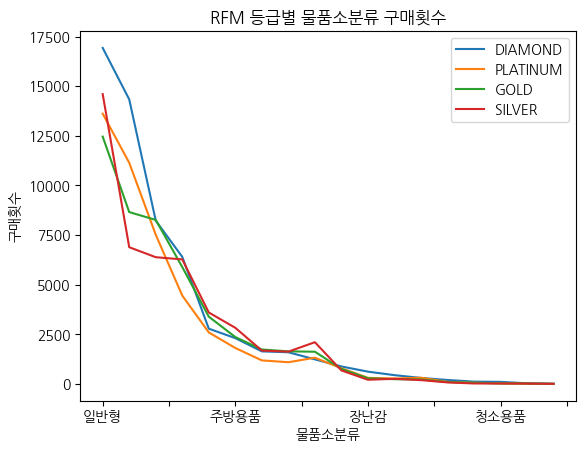

In [235]:
import matplotlib.pyplot as plt

# 하나의 그래프에 모든 데이터를 표시하기 위해서는 데이터프레임을 하나로 합쳐야 합니다.
df_all = pd.concat([df_d, df_p, df_g, df_s], axis=1)
df_all.columns = ['DIAMOND', 'PLATINUM', 'GOLD', 'SILVER'] # 각 열의 이름을 지정합니다.
# df_all = df_all.drop(['일반형', '팬티형'], axis=0) # '일반형'과 '팬티형'을 제외합니다.

df_all.plot(kind='line') # 막대그래프를 그립니다.
plt.xlabel('물품소분류') # x축 라벨을 추가합니다.
plt.ylabel('구매횟수') # y축 라벨을 추가합니다.
plt.title('RFM 등급별 물품소분류 구매횟수') # 그래프 제목을 추가합니다.
plt.show() # 그래프를 출력합니다.



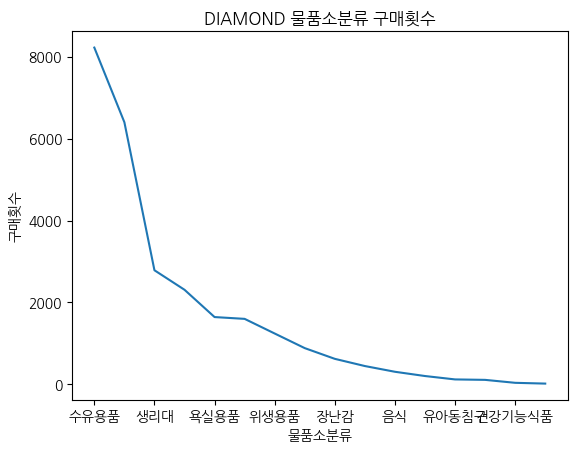

In [236]:
import matplotlib.pyplot as plt
df_d = df_d.drop(['일반형', '팬티형']) # '일반형'과 '팬티형'을 제외한 물품소분류만 남깁니다.
df_d.plot(kind='line', legend=None) # 막대그래프를 그립니다.
plt.xlabel('물품소분류') # x축 라벨을 추가합니다.
plt.ylabel('구매횟수') # y축 라벨을 추가합니다.
plt.title('DIAMOND 물품소분류 구매횟수') # 그래프 제목을 추가합니다.
plt.show() # 그래프를 출력합니다.

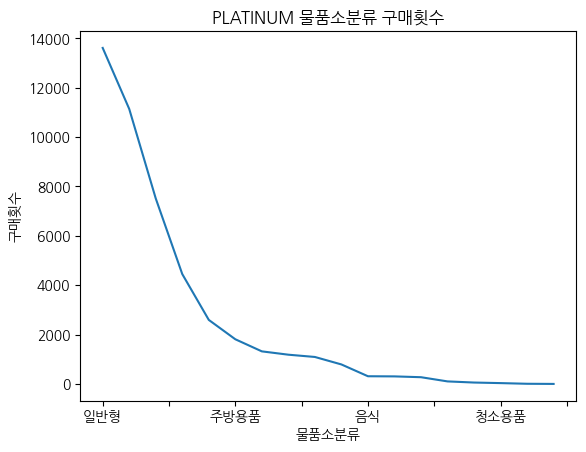

In [237]:
# '일반형'과 '팬티형'을 제외한 물품소분류만 남깁니다.
df_p.plot(kind='line', legend=None) # 막대그래프를 그립니다.
plt.xlabel('물품소분류') # x축 라벨을 추가합니다.
plt.ylabel('구매횟수') # y축 라벨을 추가합니다.
plt.title('PLATINUM 물품소분류 구매횟수') # 그래프 제목을 추가합니다.
plt.show() # 그래프를 출력합니다.

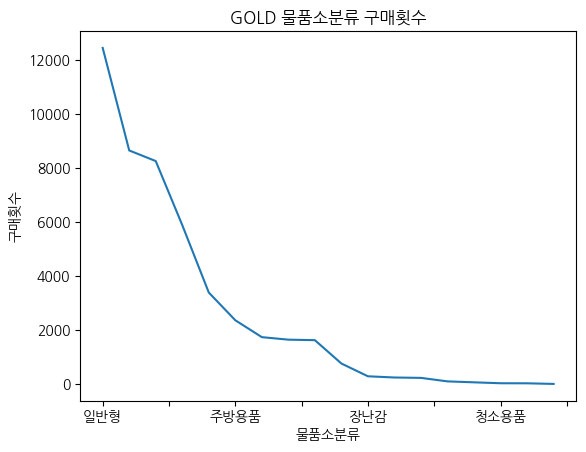

In [238]:
# '일반형'과 '팬티형'을 제외한 물품소분류만 남깁니다.
df_g.plot(kind='line', legend=None) # 막대그래프를 그립니다.
plt.xlabel('물품소분류') # x축 라벨을 추가합니다.
plt.ylabel('구매횟수') # y축 라벨을 추가합니다.
plt.title('GOLD 물품소분류 구매횟수') # 그래프 제목을 추가합니다.
plt.show() # 그래프를 출력합니다.

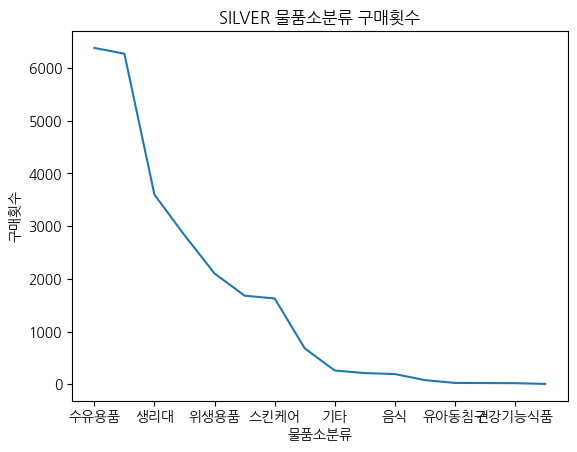

In [239]:
# '일반형'과 '팬티형'을 제외한 물품소분류만 남깁니다.
df_s = df_s.drop(['일반형', '팬티형'])
df_s.plot(kind='line', legend=None) # 막대그래프를 그립니다.
plt.xlabel('물품소분류') # x축 라벨을 추가합니다.
plt.ylabel('구매횟수') # y축 라벨을 추가합니다.
plt.title('SILVER 물품소분류 구매횟수') # 그래프 제목을 추가합니다.
plt.show() # 그래프를 출력합니다.